# Нейронные сети (PyTorch)

В данной лабораторной работе мы научимся работать с PyTorch.

По нейронным сетям в интернете можно найти огромное количество информации и примеров (официальная документация фреймворка, Kaggle, даже ChatGPT, хотя последний стоит использовать с осторожностью) - вы можете использовать любые материалы в текущей работе, но будьте готовы ответить на вопросы по коду во время защиты.

Вспомогательные материалы:

[Курс по нейронным сетям](https://stepik.org/course/110281/syllabus)

[ШАД-овский курс по глубокому обучению](https://github.com/yandexdataschool/Practical_DL/tree/fall23)

[Неплохой курс чисто про PyTorch](https://www.learnpytorch.io/)

[Документация PyTorch](https://pytorch.org/)

В целом, содержательно данная работа дублирует часть курса по Глубокому обучению.


## Введение в PyTorch (3 балла)

С точки зрения синтаксиса PyTorch похож на NumPy, основная разница заключается в том, что данный фреймворк предназначен для автоматического расчета градиентов. [Вот тут](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) можно почитать про то, как соотносятся две эти библиотеки.

In [66]:

import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
from collections import defaultdict

import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision
from torchvision.transforms import transforms

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import opendatasets as od


import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### 1

1. Создайте два вещественных тензора: $a$ размером (10, 2) и $b$ размером (, 20)

2. Создайте тензор c, являющийся тензором $b$, но размера (2, 2, 5)

3. Выведите первый столбец матрицы $a$ с помощью индексации

4. Создайте тензор $d$, являющийся тензором $b$, но размера (10, 2). Произведите все арифметические операции с тензорами $a$ и $d$

In [3]:
a = torch.Tensor(10, 2)
b = torch.Tensor(1, 20)

In [4]:
c = b.reshape(2, 2, 5)
c.shape

torch.Size([2, 2, 5])

In [5]:
a[:, 0]

tensor([0.0004, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [6]:
d = b.reshape(10, 2)
d.shape

torch.Size([10, 2])

In [7]:
a + d

tensor([[3.6634e-04, 1.3102e-42],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

In [8]:
a / d

tensor([[inf, inf],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]])

In [9]:
a - d

tensor([[3.6634e-04, 1.3102e-42],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

### 2

1. Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2. Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки * 2. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pyplot`  

3. Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [10]:
images = torch.Tensor(100, 200, 200, 3)

for i in range(images.shape[0]):
  row_number = (i)*2
  images[i, row_number:row_number+2] = 1


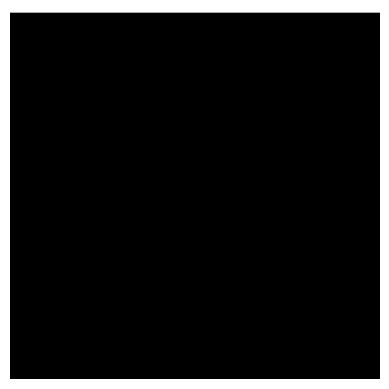

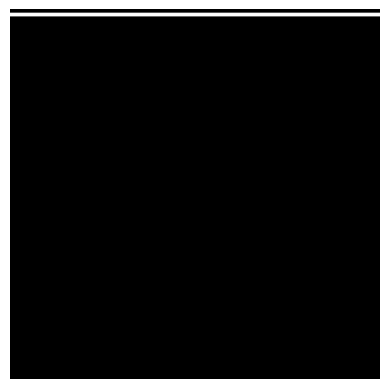

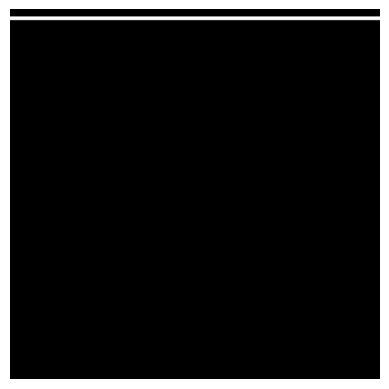

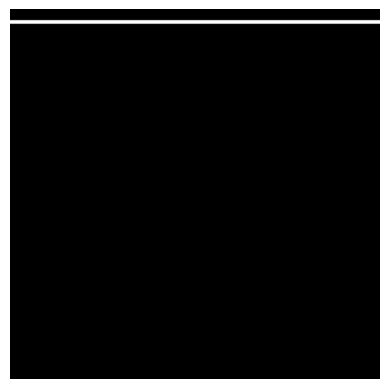

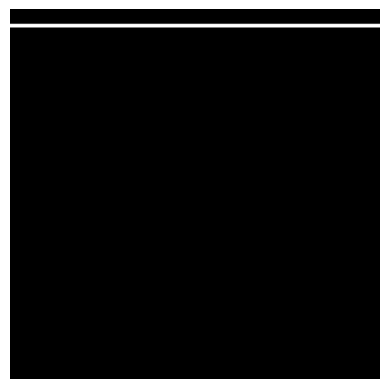

In [11]:
for i in range(5):
    image = images[i]
    fig, ax =plt.subplots(1, 1)
    ax.imshow(image)
    ax.axis('off')

### 3

1. Смените среду выполнения на GPU (в Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`))

2. Объявите тензор $a$ размера (2, 3, 4) и тензор $b$ размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)

3. Измените форму тензора $b$, чтобы она совпадала с формой тензора $a$, получите тензор $c$.

4. Переместите тензоры $a$ и $c$ на CPU.

5. Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент $L$ по $c$ ( то есть $\frac{\partial{L}}{\partial{c}})$. Выведите градиент $L$ по $c$. Также вычислите его вручную, чтобы проверить себя.

Pytorch

In [12]:
a = torch.empty(2, 3, 4, device='cpu', requires_grad=True)
torch.nn.init.uniform_(a)
b = torch.empty(1, 8, 3, device='cpu', requires_grad=True)
torch.nn.init.uniform_(b)
c = b.reshape(a.shape)
c.retain_grad()
a.to('cpu')
c.to('cpu')

L = torch.mean((c-a) ** 2)
L.backward()
c.grad

tensor([[[-0.0597, -0.0020, -0.0194, -0.0553],
         [-0.0112,  0.0087,  0.0525, -0.0169],
         [ 0.0478, -0.0223, -0.0512, -0.0309]],

        [[ 0.0380, -0.0499, -0.0018,  0.0291],
         [ 0.0282, -0.0416, -0.0731,  0.0020],
         [ 0.0120,  0.0371, -0.0590, -0.0314]]])

Вручную

In [13]:
2 * (c - a) / c.numel()

tensor([[[-0.0597, -0.0020, -0.0194, -0.0553],
         [-0.0112,  0.0087,  0.0525, -0.0169],
         [ 0.0478, -0.0223, -0.0512, -0.0309]],

        [[ 0.0380, -0.0499, -0.0018,  0.0291],
         [ 0.0282, -0.0416, -0.0731,  0.0020],
         [ 0.0120,  0.0371, -0.0590, -0.0314]]], grad_fn=<DivBackward0>)

## Основы нейронных сетей (5 баллов)

Кратко обсудим основные концепции, понимание которых необходимо для работы с PyTorch. В других фреймворках для нейронных сетей всё очень похоже.

1. **Датасеты**
  
  В PyTorch датасеты представлены классами `torch.utils.data.Dataset` или его наследниками. Они позволяют загружать данные и предоставляют доступ к ним для обучения и валидации.

2. **Нейронные сети**

  *Слои*

  Нейронные сети в PyTorch строятся с использованием `torch.nn.Module` (не единственный, но самый распространенный способ). Слои определяются внутри этих модулей и могут быть полносвязными (`torch.nn.Linear`), сверточными (`torch.nn.Conv2d`), рекуррентными (`torch.nn.LSTM`, `torch.nn.GRU`) и другими. Сло имеют входную и выходную размерность. В нейронной сети выходная размерность слоя должна быть равна входной размерности последующего слоя.

  *Функции активации*

  Функции активации, такие как ReLU (`torch.nn.ReLU`), Sigmoid (`torch.nn.Sigmoid`), Tanh (`torch.nn.Tanh`) и другие, применяются к выходу слоя для добавления нелинейности в сеть.

  *Лосс-функции*

  Лосс-функции измеряют расхождение между прогнозами модели и фактическими значениями. В зависимости от типа задачи могут использоваться различные функции активации, например, `torch.nn.CrossEntropyLoss` для классификации и `torch.nn.MSELoss` для регрессии.

  *Оптимизаторы*

  Оптимизаторы в PyTorch, такие как `torch.optim.SGD`, `torch.optim.Adam`, `torch.optim.Adagrad` и другие, используются для обновления параметров сети в процессе обучения с целью минимизации функции потерь.

  *Планировщики (шедулеры)*

  Планировщики позволяют динамически изменять скорость обучения в процессе обучения. Например, `torch.optim.lr_scheduler.ReduceLROnPlateau` уменьшает скорость обучения, если ошибка перестает уменьшаться, а `torch.optim.lr_scheduler.StepLR` или `torch.optim.lr_scheduler.CosineAnnealingLR` изменяют скорость обучения в заданные моменты или с периодическим расписанием.

3. **Обучение и валидация**

  Обучение модели включает в себя передачу данных через сеть, вычисление функции потерь, вычисление градиентов, обновление весов с использованием оптимизатора и повторение этого процесса на протяжении нескольких эпох. После обучения модели необходимо провести валидацию на независимом наборе данных для оценки ее производительности.

[Визуализация работы нейронных сетей](https://playground.tensorflow.org/).

Потренируемся писать полный цикл обучения нейронной сети на [следующем наборе данных](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

P.S. предлагаемая архитектура сети не является оптимальной, но позволяет научиться работать с основными строительными блоками PyTorch-а.

Прочитайте датасет (можно использовать библиотеку `opendatasets` для выгрузки данных с Kaggle). Посчитайте основные числовые характеристики для каждого столбца. Проанализируйте датасет на предмет дисбаланса классов. Сделайте вывод о необходимости каких-либо преобразований над данными.

Разбейте выборку на тренировочную и тестовую (`test_size=0.2, random_state=42`), проведите необходимые преобразования.

In [14]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data"
od.download(dataset_url, )

Skipping, found downloaded files in ".\breast-cancer-wisconsin-data" (use force=True to force download)


In [15]:
data_path = "breast-cancer-wisconsin-data/data.csv" 
data = pd.read_csv(data_path)
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [16]:
metrics = data.describe()
print(metrics)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [17]:
target_column = 'diagnosis'  
class_distribution = data[target_column].value_counts()
print(class_distribution)
print(class_distribution['B']/class_distribution.sum())

diagnosis
B    357
M    212
Name: count, dtype: int64
0.6274165202108963


Видим, что дисбаланс классов есть, но он не слишком большой. Ничего не будем делать с данными

In [18]:
from sklearn.model_selection import train_test_split

df_cleaned = data.drop(columns=['id', 'Unnamed: 32']) 

df_cleaned['diagnosis'] = df_cleaned['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

df_train, df_test = train_test_split(df_cleaned, test_size=0.2, random_state=42)


Создайте класс датасета. Типы данных, которые вам потребуются: `dtype=torch.float32`, `dtype=torch.long`.

Инициализируйте даталоадеры (`batch_size=32`) для тренировочных и тестовых данных. Для теста данные перемешивать (параметр `shuffle`) не надо!

In [52]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        data = dataframe.drop(columns=['diagnosis'])
        data = data.to_numpy()
        data = torch.tensor(data, dtype=torch.float)
        self.data = data
         
        target = dataframe['diagnosis']
        target = target.to_numpy()
        target = torch.tensor(target, dtype=torch.long)
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]


train_dataset = CustomDataset(df_train)
test_dataset = CustomDataset(df_test)

BATCH_SIZE=32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Создайте полносвязную нейронную сеть из нескольких слоёв. Между слоями используйте ReLU.

In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.ll1 = nn.Linear(input_size, 64)
        self.act1 = nn.ReLU()
        self.ll2 = nn.Linear(64, 32)
        self.act2 = nn.ReLU()
        self.ll3 = nn.Linear(32, 2)
        self.act3 = nn.ReLU()

    def forward(self, x):
        x = self.act1(self.ll1(x))
        x = self.act2(self.ll2(x))
        output = self.act3(self.ll3(x))
        return output

Следующий небольшой кусочек кода написан за вас. В нём используется кросс-энтропия в качестве функции потерь. Вспомните, какими характеристиками обладает данная функция и в чём особенность её реализации в PyTorch.

Письменно ответьте на вопрос, как сигмоидальная функция потерь соотносится с кросс-энтропийной.

Сигмоидальная функция потерь является частным случаем кросс-энтропии для 2-х классов

Ваш ответ:

Напишите функции для тренировки и тестирования модели. Не забудьте про `optimizer.zero_grad()` при тренировке и `with torch.no_grad()` в тесте.

Также обратите внимание, что шаг планировщика нужно совершать после шага оптимизатора.

In [72]:
def get_correct(predicted, actual):
    predicted = torch.argmax(predicted, axis=1)
    return torch.sum(predicted == actual).item()
    


def train(model, loader, criterion, optimizer, scheduler, device):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(loader):

        # Перемещение данных на устройство (GPU или CPU)
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Обнуление градиентов параметров модели
        optimizer.zero_grad()
        # Прямой проход: получение прогнозов от модели\
        predicted = model(inputs)
        # Вычисление значения функции потерь
        loss = criterion(predicted, labels)
        # Обратное распространение: вычисление градиентов
        loss.backward()
        # Обновление параметров модели с помощью оптимизатора
        optimizer.step()
        # Вычисление точности модели (Accuracy)
        correct_train += get_correct(predicted, labels)
        total_train += len(labels)
        # Аккумулирование потерь по батчам
        running_loss += loss.item()

    # Вычисление средней потери и точности на тренировочном наборе данных
    train_loss = running_loss / len(loader)
    train_accuracy = correct_train / total_train 
    # Обновление шага расписания (scheduler)
    scheduler.step()
    return train_loss, train_accuracy


def test(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        # Проход по данным тестового загрузчика
        for inputs, labels in tqdm(loader):
            # Перемещение данных на устройство (GPU или CPU)
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Получение прогнозов от модели
            predicted = model(inputs)
            # Вычисление значения функции потерь
            batch_loss = criterion(predicted, labels)
            # Вычисление точности модели (Accuracy)
            correct_test += get_correct(predicted, labels)
            # Аккумулирование потерь по батчам
            running_loss += batch_loss.item()
            #
            total_test += len(labels)

    # Вычисление средней потери и точности на тестовом наборе данных
    test_loss = running_loss / len(loader)
    test_accuracy = correct_test / total_test
    return test_loss, test_accuracy

Создайте цикл обучения вашей нейронной сети, используя написанные ранее функции.

Печатайте прогресс на каждой эпохе (`train_loss, train_accuracy, test_loss, test_accuracy`).

Постройте графики лосса и точности. Должно получиться что-то такое:

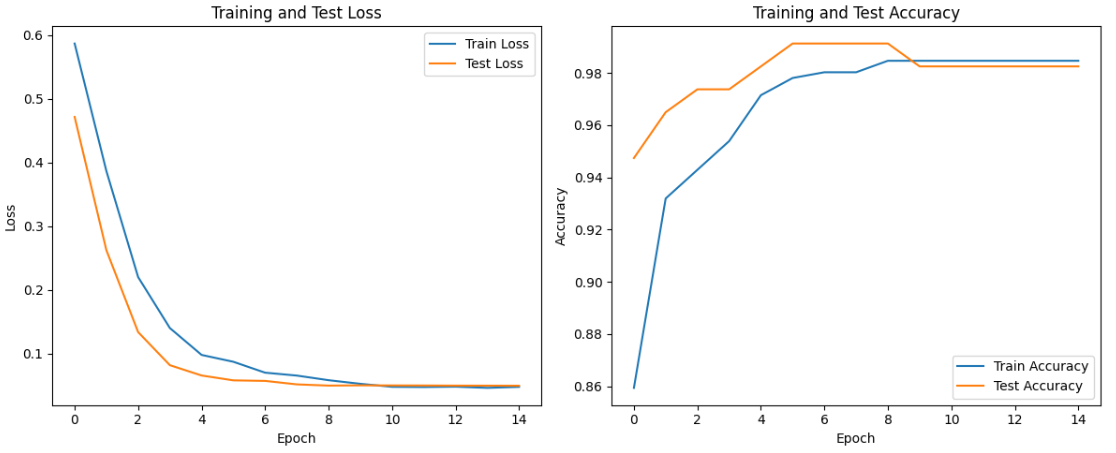

In [80]:
# PUT YOUR CODE HERE

model = NeuralNetwork(input_size=df_train.shape[1] - 1).to(device)  # -1 за счет таргета
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 20
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs+1):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, scheduler, device)
    test_loss, test_accuracy = test(model, test_loader, criterion, device)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
torch.save(model.state_dict(), 'model_checkpoint.pth')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

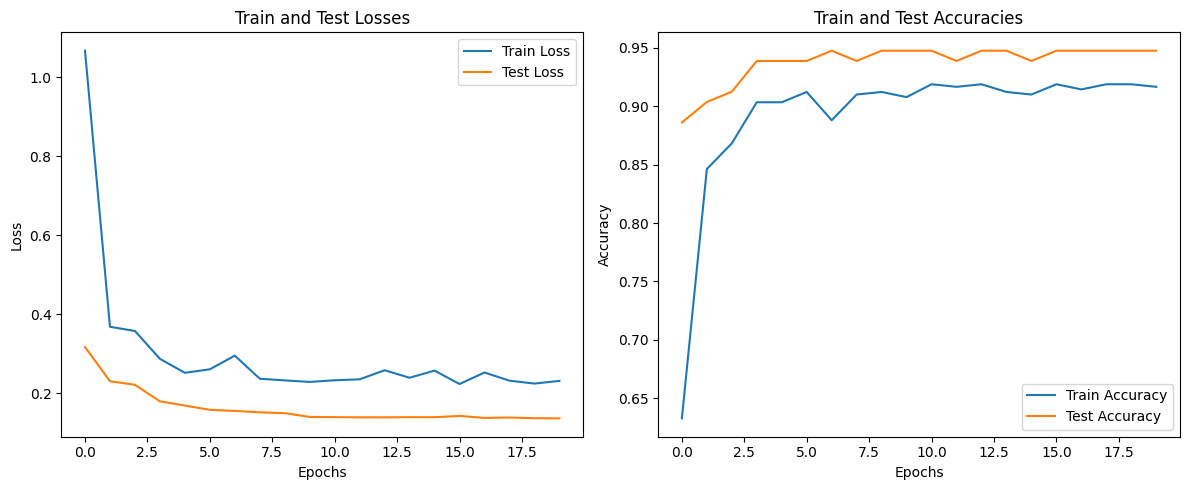

In [81]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_losses, label='Train Loss')
ax1.plot(test_losses, label='Test Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train and Test Losses')
ax1.legend()


ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(test_accuracies, label='Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train and Test Accuracies')
ax2.legend()


plt.tight_layout()
plt.show()

## Специальные архитектуры нейронных сетей

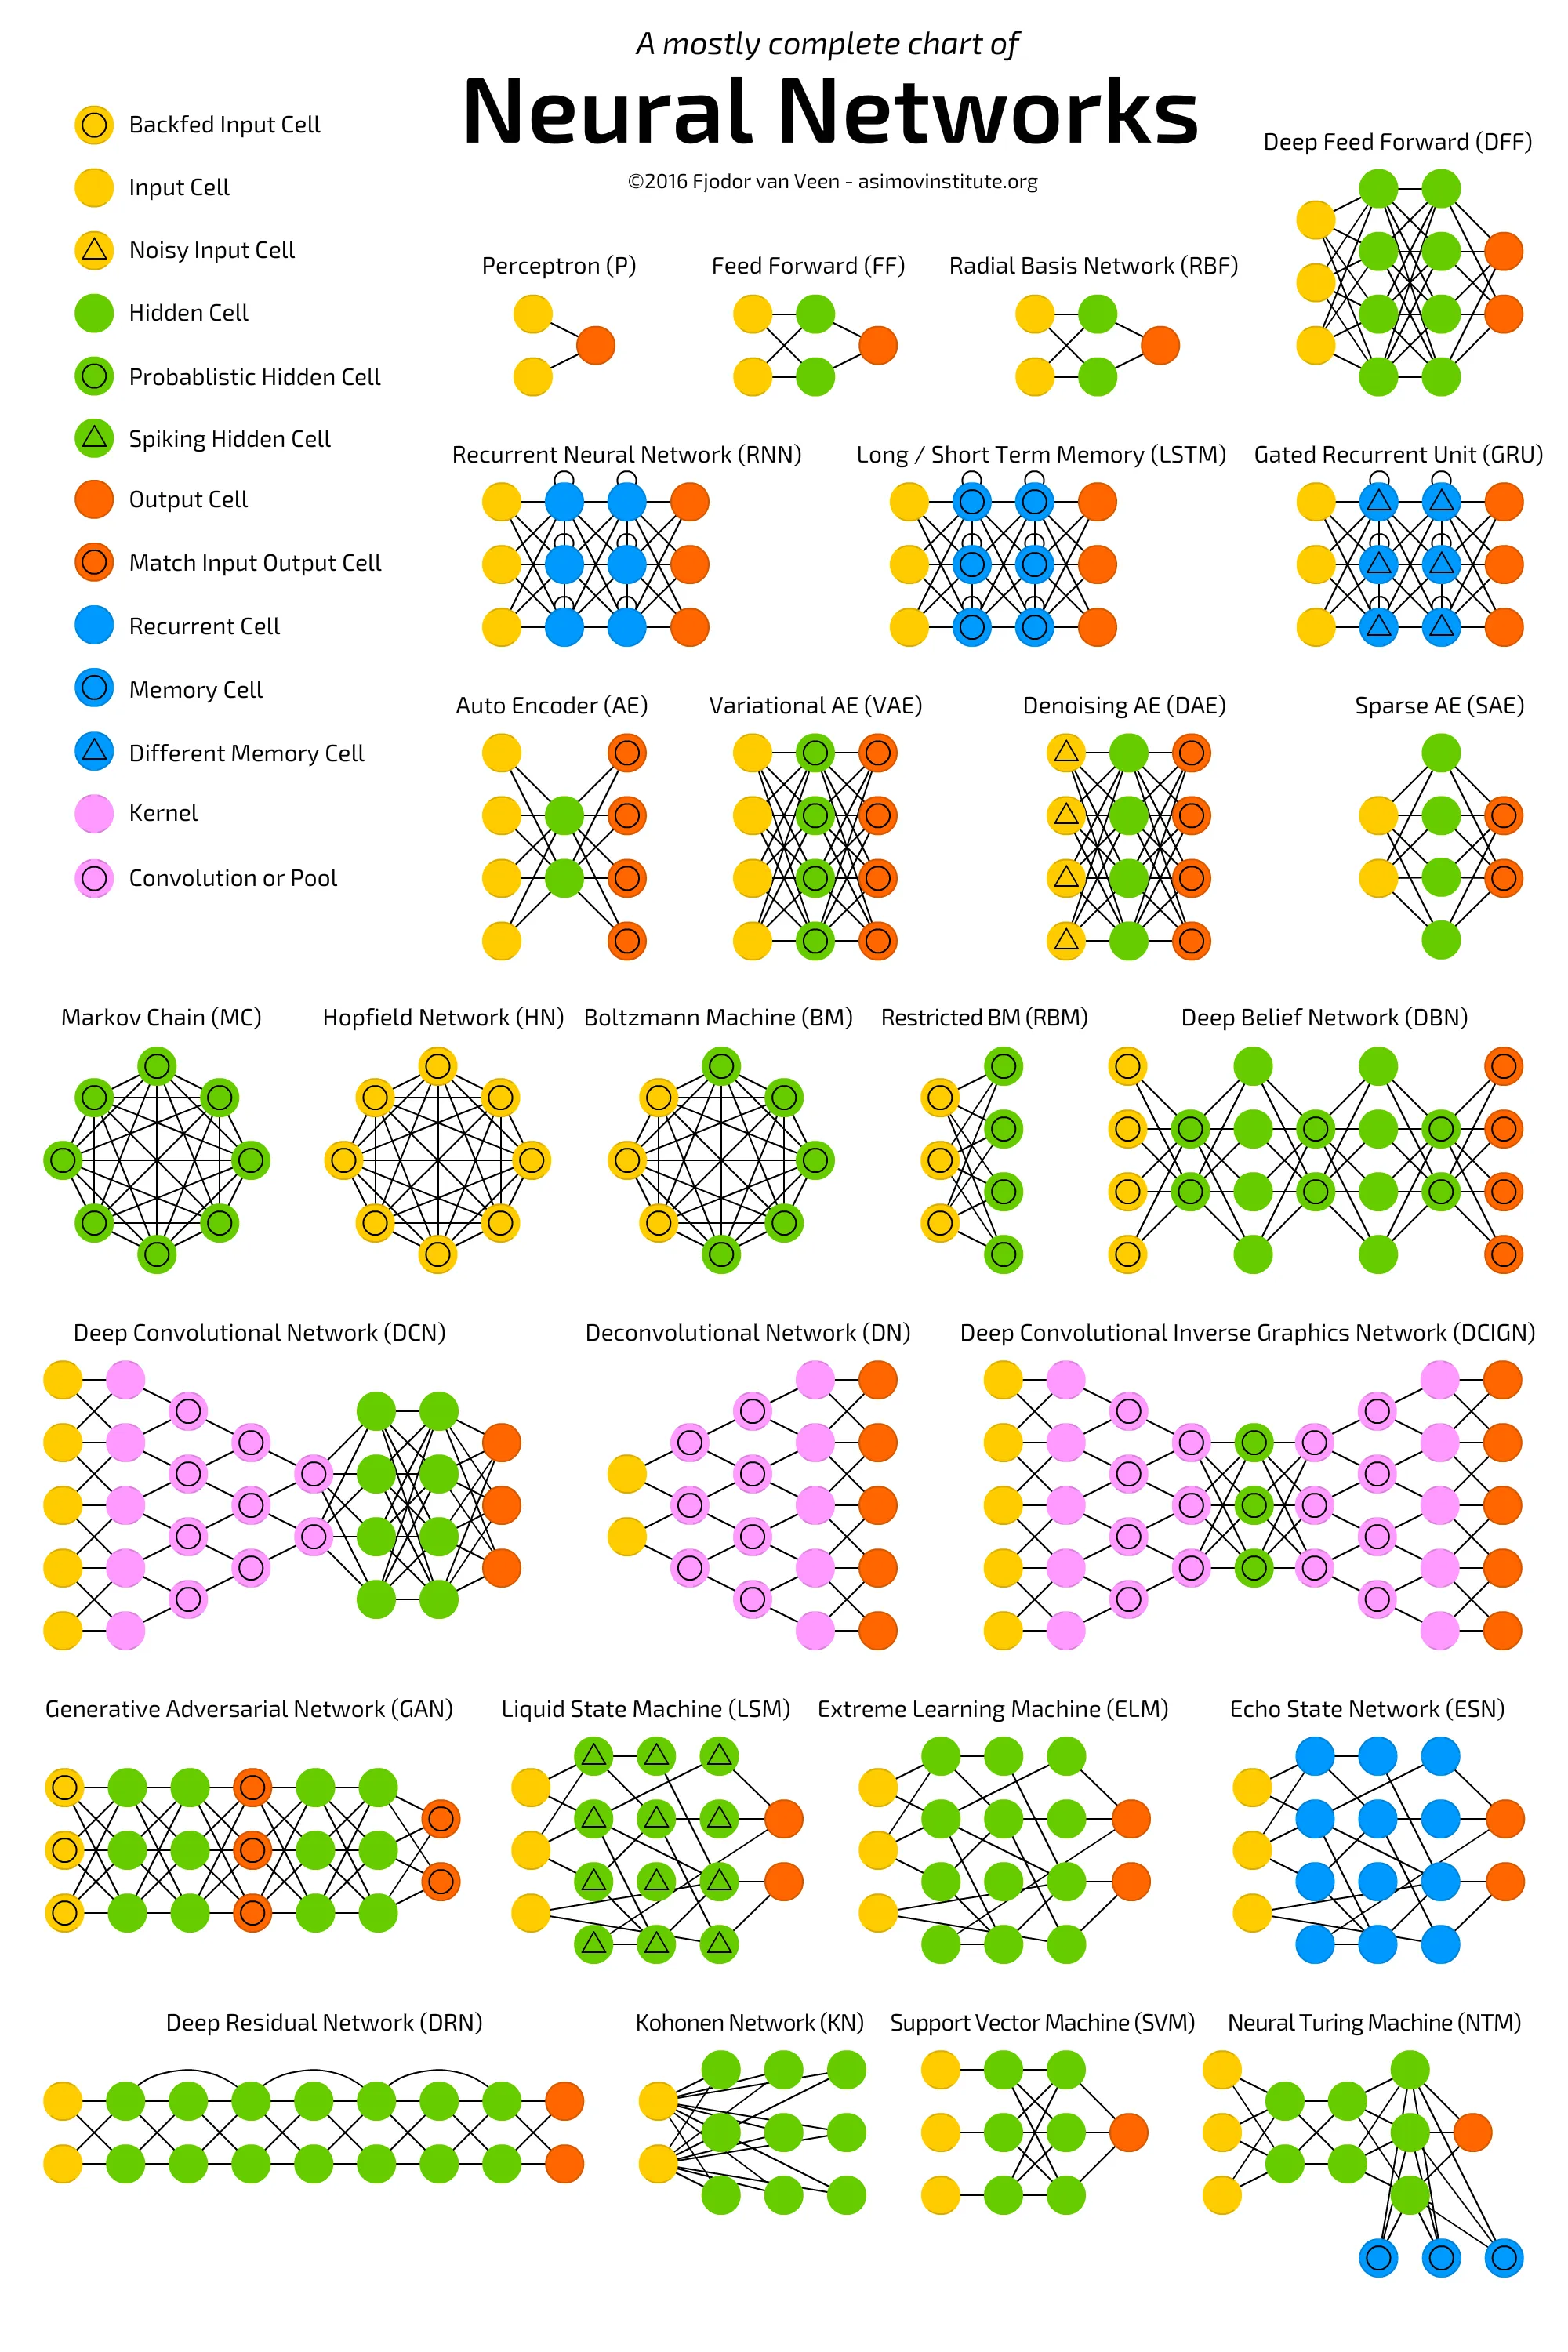

[Источник картинки](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)

В последующих заданиях можно использовать предоставленные датасеты ЛИБО найти какой-либо свой, обладающий схожими характеристиками.

### CNN (3 балла)

Свёрточные нейронные сети работают по принципу "возьмем фильтры с настраиваемыми весами и будем изменять эти веса так, чтобы фильтры выделяли те признаки, которые помогут нам решить задачу". Обычно свёрточные нейронные сети состоят из блоков свёртки и пулинга (уменьшение размерности), поверх которых добавляются несколько полносвязных линейных слоёв. [Визуализация работы свёрточной нейронной сети](https://poloclub.github.io/cnn-explainer/)

Будем решать задачу многоклассовой классификации. Датасет возьмем [отсюда](https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data). Он содержит картинки с различными пейзажами. Присутсвуют такие классы, как 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'.

Скачайте датасет (можно использвоать библиотеку `opendatasets`)

In [ ]:
# PUT YOUR CODE HERE

Создайте даталоадеры для тренировочных и тестовых данных. Используйте `torchvision.datasets.ImageFolder`. Одним из параметров данной функции является `transform`. Попробуйте применить к вашим данным какие-либо [трансформации](https://pytorch.org/vision/stable/transforms.html).

In [ ]:
train_path = "intel-image-classification/seg_train/seg_train"
test_path = "intel-image-classification/seg_test/seg_test"
batch_size = 256

transformer = transforms.Compose([])

loader = ...
loader = ...

Выведем пару картинок, обратившись к содержимому даталоадеров.

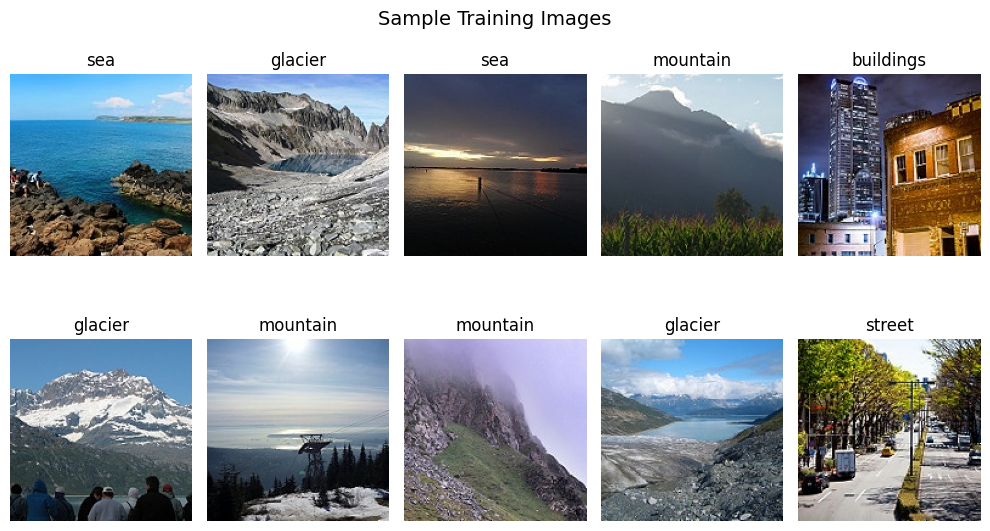

In [ ]:
images, labels = next(iter(loader))
class_names = loader.dataset.classes

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
idx = 0

for i in range(2):
    for j in range(5):
        label = class_names[labels[idx].item()]
        ax[i, j].set_title(f"{label}")
        img = images[idx]

        img = img / 2 + 0.5  # обратное преобразование из-за трансформаций. возможно, вам оно не пригодится

        npimg = np.transpose(img.numpy(), (1, 2, 0))
        ax[i, j].imshow(npimg)
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=14)
plt.show()

Реализуйте свёрточную нейронную сеть и обучите её, используя тот же пайплайн, что и в предыдущем задании.

Задача не из простых, так как при использовании свёрточных нейронных сетей нужно внимательно следить за размерностями входных и выходных слоёв. Вам пригодятся такие слои, как Conv2d, BatchNorm2d, MaxPool2d, Linear или любые другие на ваше усмотрение. В качестве функции активации можно использовать ReLU.

Задача достаточно творческая, сфокусируйтесь на проведении экспериментов, а не на том, чтобы "выбить метрику". В данной задаче accuracy выше 0.7 на тесте будем считать хорошим результатом.

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=6):
        super(ConvNet, self).__init__()
        # PUT YOUR CODE HERE

    def forward(self, input):
        pass

In [ ]:
# PUT YOUR CODE HERE

Посмотрим, что наша модель предсказывает, на отложенной выборке. Так как для новых данных у нас отсутсвует разметка по классам, придется создать кастомный датасет для подгружения данных по частям. Подгрзить все картинки сразу нельзя - они не поместятся в оперативную память.

Создайте кастомный датасет для того, чтобы картинки подгружались динамически. [Пример можно найти здесь](https://www.learnpytorch.io/04_pytorch_custom_datasets/). Не забудьте применить трансормации, если вы использовали их при обучении модели.

Выведите пример того, что предсказывает ваша модель.

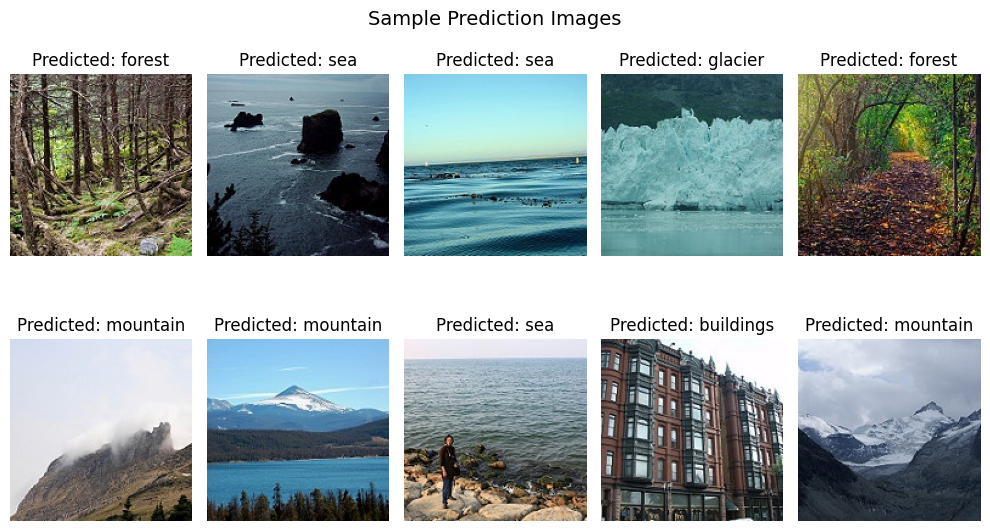

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        # PUT YOUR CODE HERE

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # PUT YOUR CODE HERE
        return image


pred_path = "intel-image-classification/seg_pred/seg_pred"
pred_data = CustomDataset(pred_path, transform=transformer)

batch_size = 10
pred_loader = DataLoader(pred_data, batch_size=batch_size, shuffle=False)

model.eval()

images = next(iter(pred_loader)).to(device)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
idx = 0

for i in range(2):
    for j in range(5):
        label = class_names[predicted[idx].item()]
        ax[i, j].set_title(f"Predicted: {label}")
        img = images[idx].cpu() / 2 + 0.5  # обратное преобразование из-за трансформаций. возможно, вам оно не пригодится
        npimg = np.transpose(img.numpy(), (1, 2, 0))
        ax[i, j].imshow(npimg)
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Prediction Images", fontsize=14)
plt.show()

### RNN (3 балла)

Recurrent Neural Network или рекуррентная нейронная сеть. Её логическим продолжением стала архитектура LSTM (Long Short-term Memory). Эти архитектуры призваны решать задачу обработки последовательностей и учитывают не только сигналы с непосредственно предыдщуего слоя, но и сигналы с более дальних слоёв.

[Здесь](https://qudata.com/ml/ru/NN_RNN_Torch.html) можно найти хорошее объяснение.

Будем решать задачу генерации текста. Принцип работы следующий: модель имеет представление обо всех словах словаря. На вход модель получает последовательность слов, её задача - определить, какое слово из словаря будет наиболее вероятным продолжением этой последовательности. То есть, по сути решается задача многоклассовой классификации.

В данном случае под "словом" понимает токен - то есть любая единица текстовых данных, которой присвоен код, - будь то буква, слог, слово или несколько слов сразу.

В качестве данных возьмем любую из книг "Игра престолов". Тексты книг можно найти [здесь](https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books).

Начнем с небольшой предобработки. Напишите функцию предобработки, которая приведет текст к нижнему регистру, удалит из него конструкции вида "Page n". Также удалим все символы, которые не являются буквами, пробелами, точками или вопросительными знаками. В том числе удалим переносы строк.

In [10]:
import re
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()
    
    # Удаление конструкций вида "Page n"
    text = re.sub(r'page \d+', '', text)
    # Удаление символов, которые не являются буквами, пробелами, точками или вопросительными знаками
    text = re.sub(r'[^a-z\s\.\?]', '', text)
    
    # Удаление переносов строк
    text = text.replace('\n', ' ')
    
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

Теперь нам потребуется токенизатор, который будет присваивать словам числовые коды. В качестве метода разбиения текста на составные части предлагается использовать`sent_tokenize` и `word_tokenize` из `nltk`.

In [42]:
class Tokenizer:
    def __init__(self):
        self.unknown_token = 'UNK'
        self.unknown_index = 0
        self.word2ind = {self.unknown_token: self.unknown_index}
        self.ind2word = {self.unknown_index: self.unknown_token}

    def fit(self, corpus):
        # Опустошаем словари
        self.word2ind = {self.unknown_token: self.unknown_index}
        self.ind2word = {self.unknown_index: self.unknown_token}
        
        index = 1
        for text in corpus:
            words = word_tokenize(text)
            for word in words:
                if word not in self.word2ind:
                    self.word2ind[word] = index
                    self.ind2word[index] = word
                    index += 1 
                

    def text2ind(self, text):
        token_list = word_tokenize(text)
        return self.tokenlist2ind(token_list)
    
    def tokenlist2ind(self, token_list):
        sequence = [self.word2ind.get(word, self.unknown_index) for word in token_list]
        return sequence

    def ind2text(self, sequence):
        words = [self.ind2word.get(index, self.unknown_token) for index in sequence]
        return words
    
    
text = "Hello world. This is a test."
corpus = sent_tokenize(text)
tokenizer = Tokenizer()
tokenizer.fit(corpus)

encoded_text = tokenizer.text2ind(text)
decoded_text = tokenizer.ind2text(encoded_text)

print("Original text:", text)
print("Encoded text:", encoded_text)
print("Decoded text:", decoded_text)

Original text: Hello world. This is a test.
Encoded text: [1, 2, 3, 4, 5, 6, 7, 3]
Decoded text: ['Hello', 'world', '.', 'This', 'is', 'a', 'test', '.']


Подготовим датасет. Для обучения модели было бы неплохо привести все подаваемые на вход сети последовательности к одной длине. Можно работать и с последовательностями разной длины, если объединять их в батчи, где длины совпадают, но сейчас мы будем придерживаться более простой тактики.

Реализуйте функцию `split_sentences_into_chunks`, которая будет возвращать последовательности длиной `max_seq_length + 1` (единица, так как в дальнейшем крайнее правое слово станет таргетом). Будем добавлять паддинг слева, если длина текста не делится на `max_seq_length + 1` нацело. В качестве значения для паддинга можете использовать `tokenizer.unknown_index`.

In [43]:
[1] * 0

[]

In [50]:
def split_sentences_into_chunks(sentences, tokenizer, max_seq_length=8):
    chunks = []
    sequence_length = max_seq_length + 1  # Увеличиваем на 1, чтобы учесть таргет
    
    for sentence in sentences:
        words = word_tokenize(sentence)
        total_length = len(words)
    
        # Определяем количество слов, необходимых для паддинга
        padding_needed = max(0, sequence_length - total_length)
        padded_words = [tokenizer.unknown_token] * padding_needed + words

        for i in range(len(padded_words)-sequence_length+1):
            chunk_words = padded_words[i:i + sequence_length]
            chunk_encoded = tokenizer.tokenlist2ind(chunk_words)
            chunks.append(chunk_encoded)
        
    return chunks
    
    

In [53]:
text = '''

    She tried to explain that love wasn't like pie. There wasn't a set number of slices to be given out. There wasn't less to be given to one person if you wanted to give more to another. That after a set amount was given out it would all disappear. She tried to explain this, but it fell on deaf ears.
'''

preprocessed_text = preprocess_text(text)
sentences = sent_tokenize(preprocessed_text)
tokenizer = Tokenizer()
tokenizer.fit(sentences)

data = split_sentences_into_chunks(sentences, tokenizer, max_seq_length=10)
for chunk in data:
    print(tokenizer.ind2text(chunk))
    

['UNK', 'she', 'tried', 'to', 'explain', 'that', 'love', 'wasnt', 'like', 'pie', '.']
['there', 'wasnt', 'a', 'set', 'number', 'of', 'slices', 'to', 'be', 'given', 'out']
['wasnt', 'a', 'set', 'number', 'of', 'slices', 'to', 'be', 'given', 'out', '.']
['there', 'wasnt', 'less', 'to', 'be', 'given', 'to', 'one', 'person', 'if', 'you']
['wasnt', 'less', 'to', 'be', 'given', 'to', 'one', 'person', 'if', 'you', 'wanted']
['less', 'to', 'be', 'given', 'to', 'one', 'person', 'if', 'you', 'wanted', 'to']
['to', 'be', 'given', 'to', 'one', 'person', 'if', 'you', 'wanted', 'to', 'give']
['be', 'given', 'to', 'one', 'person', 'if', 'you', 'wanted', 'to', 'give', 'more']
['given', 'to', 'one', 'person', 'if', 'you', 'wanted', 'to', 'give', 'more', 'to']
['to', 'one', 'person', 'if', 'you', 'wanted', 'to', 'give', 'more', 'to', 'another']
['one', 'person', 'if', 'you', 'wanted', 'to', 'give', 'more', 'to', 'another', '.']
['that', 'after', 'a', 'set', 'amount', 'was', 'given', 'out', 'it', 'would'

Теперь создадим класс датасета. Единственная его задача - разделять входную последовательность на то, по чему мы предсказываем, и то, что мы предсказываем. На выходе должны получаться пары вида ([токены], токен).

In [54]:
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        chunk = self.data[idx]
        X = chunk[:-1]
        y = chunk[-1]
        return torch.tensor(X), torch.tensor(y)

Сложим всё воедино:

In [57]:
od.download('https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books


100%|██████████| 3.71M/3.71M [00:01<00:00, 2.01MB/s]

In [58]:
with open('game-of-thrones-books/001ssb.txt', 'r') as file:  # файл с книгой
    text = file.read()

preprocessed_text = preprocess_text(text)

sentences = sent_tokenize(preprocessed_text)
tokenizer = Tokenizer()
tokenizer.fit(sentences)

data = split_sentences_into_chunks(sentences, tokenizer, max_seq_length=10)
random.shuffle(data)

split_ratio = 0.9  # кастомное разбиение на train-test
train_data = data[:int(split_ratio * len(data))]
test_data = data[int(split_ratio * len(data)):]

train_dataset = TextDataset(train_data)
test_dataset = TextDataset(test_data)

loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for X_batch, y_batch in loader:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    break

X_batch shape: torch.Size([32, 10])
y_batch shape: torch.Size([32])


Создайте нейронную сеть минимум из следующих слоев: `Embedding`, `LSTM`, `Dropout`, `Linear`.

In [65]:

class TextGenModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=256,
            num_layers=2,
            batch_first=True, # Что означает batch_first?
            dropout=0.2  # Почему dropout можно только при 2-х слоях?
        )
        
        self.dropout = nn.Dropout(p=0.2)
        self.linear = nn.Linear(256, vocab_size)
        
    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :] # last layer o
        x = self.linear(self.dropout(x))
        return x



vocab_size = len(tokenizer.word2ind)

model = TextGenModel(vocab_size, 1024)

# Пример входных данных (batch_size, sequence_length)
x = torch.randint(0, vocab_size, (32, 10))  # Пример случайного батча
output = model(x)
print(output.shape)

torch.Size([32, 11942])


Обучите модель. Можно использовать тот же пайплайн, что и в предыдущих заданиях.

Нужно отметить, что Accuracy не очень подходит в качестве метрики для задач генерации текста, так как явялется очень грубым приближением качества. Будем ориентироваться не на значение метрики, а на динамику.

Если ваша модель при инференсе не выдает `unk` бесконечно, значит вы всё сделали правильно.

In [ ]:
# PUT YOUR CODE HERE

Попробуйте сгенерировать вашей моделью какой-либо текст. Похоже на слог "Игры престолов"?

In [ ]:
def generate_text(seed_text, tokenizer, model, max_seq_length=8, max_len=120, device='cpu', stops=['.']):
    stops = [tokenizer.word2ind.get(stop) for stop in stops]  # если мы встретили какой-либо из данных символов, то прекращаем генерацию

    model.eval()
    with torch.no_grad():
        seed_tokens = tokenizer.text2ind(seed_text)  # токенизируем текст
        current_tokens = seed_tokens[:]

        if len(current_tokens) < max_seq_length:  # добавим паддинг, если текст слишком короткий
            current_tokens = [tokenizer.unknown_index] * (max_seq_length - len(current_tokens)) + current_tokens

        while len(current_tokens) < max_len:
            inputs = torch.tensor(current_tokens[-max_seq_length:]).unsqueeze(0).to(device)

            outputs = model(inputs)  # предсказания модели
            _, predicted = torch.max(outputs, 1)  # возьмем самый вероятный токен. можно брать случайный из какого-то топа, чтобы добавить случайность
            current_tokens.append(predicted.item())

            if current_tokens[-1] in stops:
                break

    return tokenizer.ind2text(current_tokens)  # преобразование из токенов обратно в слова. можно добавить пост-обработку

In [ ]:
print(generate_text("winter is", tokenizer, model, max_len=120, device=device))

['UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'winter', 'is', 'not', 'the', 'same', '.']


In [ ]:
print(generate_text("you", tokenizer, model, max_len=120, device=device))

['UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'you', 'are', 'a', 'hundred', 'swords', 'in', 'your', 'hand', '.']


In [ ]:
print(generate_text("i am", tokenizer, model, max_len=120, device=device))

['UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'i', 'am', 'the', 'dragon', 'and', 'the', 'lord', 'of', 'the', 'eyrie', 'gods', 'and', 'the', 'first', 'men', 'of', 'the', 'seven', 'kingdoms', 'and', 'protector', 'of', 'the', 'realm', '.']


In [ ]:
print(generate_text("when the", tokenizer, model, max_len=120, device=device))

['UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'when', 'the', 'king', 'dies', 'they', 'had', 'gone', 'now', '.']


In [ ]:
print(generate_text("it was a", tokenizer, model, max_len=120, device=device))

['UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'it', 'was', 'a', 'stirring', 'sight', 'in', 'the', 'wind', '.']


Если интересно, можно изучить и попробовать повторить [туториал про работу LLM](https://levelup.gitconnected.com/building-a-million-parameter-llm-from-scratch-using-python-f612398f06c2). Кажется, что результаты той модели должны быть лучше, нежели однослойной LSTM-ки :)

### Что еще?

Лабораторная работа получилось достаточно объемной, поэтому мы не будем рассматривать в ней перенос обучения и fine-tuning. Однако при желании вы можете изучить материалы самостоятельно. [Про разницу transfer learning-а и fine-tuning-а](https://dev.to/luxacademy/understanding-the-differences-fine-tuning-vs-transfer-learning-370).

Основная идея переноса обучения заключается в том, что кто-то уже обучил сложную и тяжелую нейронную сеть за нас, а мы теперь используем признаки, которые эта сеть умеет находить, для решения нашей задачи, надстраивая над ней небольшую "шапку", которую мы и обучаем.

Fine-tuning очень похож на перенос обучения, но помимо обучения "шапки" мы так же размораживаем для обучения часть весов модели.

[Хороший пример дообучения BERT-а для задачи анализа тональности](https://github.com/curiousily/Getting-Things-Done-with-Pytorch/blob/master/08.sentiment-analysis-with-bert.ipynb).